<a class="anchor" id="home"><img src="Images/frangiPANe.png" width=50% align=right></a>

***

# <span style="color: #3987C4;">Table of contents</span>
<a class="anchor" id="home"></a>

[I - What is frangiPANe?](#whatabout)

* [Map-then-assembly approach](#approach)
* [Requirements](#requirements)
* [Data test](#datatest)
* [License](#license)
    
[II - Preparing frangiPANe analysis](#howtoconfigure)
* [Import python packages used by frangiPANe](#importpackages)
* [Definition of input data used by frangiPANe workflow](#configinput)
* [Creating frangiPANe output directory](#outputdir)
* [Creating log file](#logfile)
* [Preparing Genome Reference for next analysis](#reference)
* [Analyzing Group File](#group)
    
[III - Workflow](#workflow)
* [1 - Stats about raw data](#rawdata)
* [2 - Mapping the individuals reads against the reference genome](#mapping)
* [3 - Assembly of the individuals' reads that do not map (properly paired) on the reference genome](#assembly)
* [4 - Removing Contamination](#contamination)
* [5 - Reducing Sequence Redundancy](#redundancy)
* [6 - Anchoring Clusters on reference genome](#anchoring)

***

[<img src="Images/up-arrow.png" alt="Top" width=2% align="right">](#home "Go back to the top")

# <span style="color: #3987C4;"> I - What is frangiPANe ?  <a class="anchor" id="whatabout"></a></span>

This tool allows the generation of a linear panreference, from paired-end short-reads and a reference genome using a Map-Then-Assembly approach.

<img src="Images/frangiPANe_overview.jpg" width=70%>

### <span style="color: #919395"> _Map-then-assembly approach_ <a class="anchor" id="approach"></a></span>

<img src="Images/approachMapThenAssembly.jpg" width=80%>

### <span style="color: #919395"> _Data test_ <a class="anchor" id="datatest"></a></span>

<details>


#### __Rice__ 

##### _Illumina sequenced dataset_

3 African Rice whole-genome sequences (Cubry and al., 2018) were used (paired-end illumina, 2x101bp, ~35X) :

* AA, _O. barthii_ (African Rice wild)
* AB, _O. barthii_ (African Rice wild)
* DT, _O. glaberrima_ (African Rice cultivated)

><sub><sup>Cubry P, Tranchant-Dubreuil C, Thuillet AC, Monat C, Ndjiondjop MN, Labadie K, Cruaud C, Engelen S, Scarcelli N, Rhoné B, Burgarella C, Dupuy C, Larmande P, Wincker P, François O, Sabot F, Vigouroux Y. The Rise and Fall of African Rice Cultivation Revealed by Analysis of 246 New Genomes. Curr Biol. 2018 Jul 23;28(14):2274-2282.e6. doi: 10.1016/j.cub.2018.05.066. Epub 2018 Jul 5. PMID: 29983312.</sub></sup>

##### _Genome Reference_

_Oryza glaberrima_ (OMAPv2 sequence, ref)

</details>

### <span style="color: #919395">_Requirements_ <a class="anchor" id="requirements"></a></span>

<details>

* python version

* Python modules used
    * os, io, subprocess
    * Ipython
    * ipywidgets
    * trailets
    * tkinter
    * numpy, pandas
    * matplotlib
    * seaborn
    * panel
    
* Bioinformatics software (version)
    * ea-utils (fastq-stats [doc] (https://expressionanalysis.github.io/ea-utils/)] : Command-line tools for processing biological sequencing data. 
    * BWA [[doc](http://bio-bwa.sourceforge.net/bwa.shtml), [github](https://github.com/lh3/bwa)] : software package for mapping DNA sequences against a large reference genome
    * Samtools [[doc](http://www.htslib.org/doc/samtools.html)] : suite of programs for interacting with high-throughput sequencing data : http://www.htslib.org/download/
    * ABySS [[github](https://github.com/bcgsc/abyss)] : de novo sequence assembler intended for short paired-end reads and large genomes
    * assembly-stats [[github](https://github.com/sanger-pathogens/assembly-stats)] 
    * cd_hit [[github](https://github.com/weizhongli/cdhit/blob/master/doc/cdhit-user-guide.wiki)]

</details>

### <span style="color: #919395">_License_ <a class="anchor" id="license"></a></span>

* Licencied under CeCill-C (http://www.cecill.info/licences/Licence_CeCILL-C_V1-en.html) and GPLv3
* Intellectual property belongs to IRD, ... and SouthGreen development platform
* Written by Clothilde Chenal and Christine Tranchant-Dubreuil
* Copyright 2021

***

[<img src="Images/up-arrow.png" alt="Top" width=2% align="right">](#home "Go back to the top")

# <span style="color: #3987C4;">II - Preparing frangiPANe analysis <a class="anchor" id="howtoconfigure"></a></span>

### <span style="color: #919395"> _Import python packages used by frangiPANe_ </span>

In [1]:
from tools.jupyter import dashboard_group
from tools.jupyter import *
from tools.frangiPANe import *

import panel as pn
pn.extension()

add_css()

text = "Import all python packages required successfully"
display_alert(text,"success")

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

### <span style="color: #919395"> _Definition of input data used by frangiPANe workflow_  <a class="anchor" id="configinput"></a></span>

<details>

* __Project Name__ : the directory name that will contain all the results generated by this analysis
* __Output Directory__ : the parent directory that will contain the __project_name__ directory
* __Fastq Directory__ : the directory that contains .fastq files of all the individuals
* __Reference File__ : the reference genome used to map all reads (fastq files). The reference genome have to be provided in a fasta format. The reference genome must be indexed by BWA for subsequent analyzes. The **REF**.amb, **REF**.ann, **REF**.bwt, **REF**.pac and **REF**.sa files are created.)
* __Group File__ :  (It is common for several individuals to have different origins when building a pangenome. To exploit this diversity in the results, PANtoum needs a tabulated file (separator = tabulation, no header); the first column corresponds to the name of the individuals (should correspond to .fastq files) and the second to the group they belong. NB : It is possible to use only one group.)

ex of samples with 2 groups : wild or cultivated
    
| sample  | group  |
|---|---|
| AA | wild | 
| AB  | wild | 
| CB  | cultivated |

</details>

Run the following cell and fill the parameters box

In [2]:
hide_cell()
project_namew, out_dirw, reference_genomew, group_filew, fastq_dirw, cpu= box_config()

In [2]:
#if hasattr(out_dirw, 'dir') and hasattr(project_namew,'value'):
host_dir = out_dirw.dir
project_name = project_namew.value
output_dir = host_dir + "/frangiPANe_" + project_name
    
#elif hasattr(reference_genomew, 'file'):
reference_genome = reference_genomew.file
    
#elif hasattr(fastq_dirw, 'dir'):
fastq_dir = fastq_dirw.dir
    
#elif hasattr(group_filew, 'file'):
group_file = group_filew.file
                                        
#elif hasattr(cpu,'value'):
cpu = cpu.value
    
#else:
#text=f"Output directory don't set !!!!"""
#pn.pane.Alert(text, alert_type="danger")


text = f"""
### All fields successfully filled 

<hr>

* PROJECT NAME : {project_name}
* HOST DIR : {host_dir}
* OUTPUT DIR : {output_dir}
* REFERENCE GENOME : {reference_genome}
* FASTQ DIR : {fastq_dir}
* GROUP FILE : {group_file}
* CPU : {cpu}
"""

display_alert(text,"success")


NameError: name 'out_dirw' is not defined

In [3]:
#  A SUPPRIMER APRES MAIS UTILE POUR TESTER SANS PASSER PAR BOX : CHRISTINE
project_name="rice" 
host_dir="/home/jovyan/"
output_dir="/home/jovyan/frangiPANe_rice/" 
reference_genome="/home/jovyan/rice/OglaRS2ADWL02.12chronly.fa"
fastq_dir="/home/jovyan/rice"
group_file="/home/jovyan/rice/rice_group_all.txt"
cpu = 6

text = f"""
### All input data saved successfully 

<hr>

* PROJECT NAME : {project_name}
* HOST DIR : {host_dir}
* OUTPUT DIR : {output_dir}
* REFERENCE GENOME : {reference_genome}
* FASTQ DIR : {fastq_dir}
* GROUP FILE : {group_file}
* CPU : {cpu}
"""

display_alert(text,"success")

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

### <span style="color: #919395">_Creating frangiPANe output directory_<a class="anchor" id="outputdirectory"></a></span>

<img src="Images/frangiPANe_output_tree.jpg">

Be careful : if the directory already exists, files and directory that were generated by previous analysis could be removed by new analysis steps

In [4]:
make_dir(output_dir)

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

### <span style="color: #919395">_Creating log file_</span>

Saved all outputs generated by bioinformatics tools (eg: bwa index, mem, abyss)

In [5]:
logger = init_log(output_dir,project_name)
#logger.info(log_parameter)

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

### <span style="color: #919395">_Preparing Genome Reference for next analysis_

#### __Genome indexation__

This step is done with `bwa index` if index are absent. Indexation is required before performing reads mapping against genome reference.

In [7]:
index_reference_genome(reference_genome, logger)

Alert(str, alert_type='info', css_classes=['alert', 'alert-info'], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

TypeError: exceptions must derive from BaseException

#### __Genome Reference dashboard__

Column(background='WhiteSmoke', sizing_mode='stretch_both')
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Row
        [0] Matplotlib(Figure)
        [1] DataFrame(DataFrame)
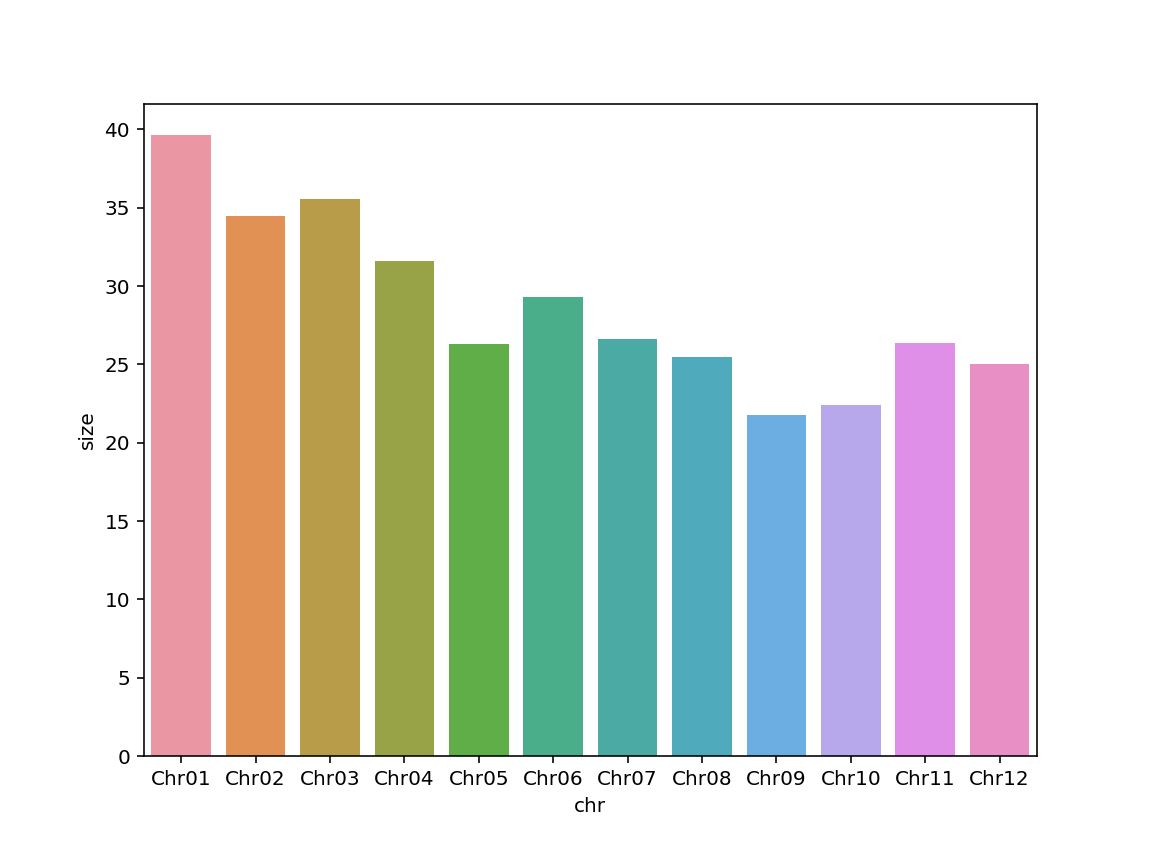

In [13]:
total_genome_size=dashboard_genome(reference_genome)

### <span style="color: #919395">_Analyzing Group File_</span> 

#### __Reading Group file__


In [14]:
id_dict, df_group = read_group_file(group_file,logger)

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

#### __Group file dashboard__


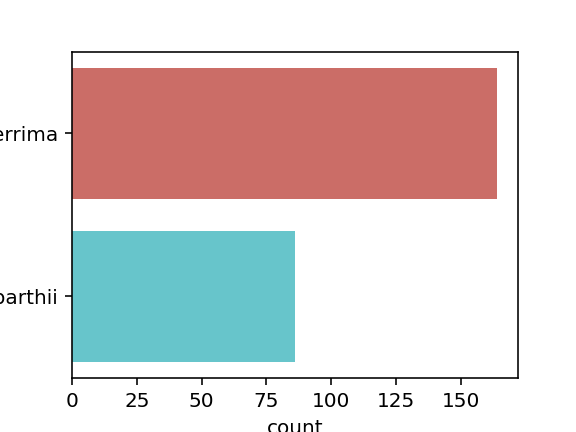

In [15]:
dashboard_group(df_group)

***

[<img src="Images/up-arrow.png" alt="Top" width=2% align="right">](#home "Go back to the top")


# <span style="color: #3987C4;">III - frangiPANe Workflow <a class="anchor" id="workflow"></a></span>

<img src="Images/approachMapThenAssembly.jpg" width=60%>



Only fastq files corresponding to samples described in the group file (contained in fastq directory) will be used in this workflow.

Fastq naming convention: 
* sample_code_1.fastq, sample_code_R1.fastq
* sample_code_1.fq, sample_code_R1.fq
* sample_code_2.fastq, sample_code_R2.fastq
* sample_code_2.fq, sample_code_R2.fq

with sample_code read from the group file (1st column)



### <span style="color: #919395"> _1 - Stats about raw data (fastq files)_

#### __Creating directory__

In [16]:
stat_dir = output_dir + "/00-fastq_stats/"

#### __Generating fastq statistics with `fastq_stats`__

In [17]:
fastq_stats_dir(fastq_dir, stat_dir, df_group, logger)

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='info', css_classes=['alert', 'alert-info'], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='info', css_classes=['alert', 'alert-info'], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

#### __Merging all files generated by fastq_stat (one by sample)__

In [18]:
fastqstat_csv=stat_dir+"all_fastq-stats.csv"
merge_fastqstat(fastqstat_csv, stat_dir,logger)

After this stat analysis, several files have been created and saved into 00_fastq_stats directory :
* one file (fastq-stat) by fastq file
* one file with all stats : all_fastq-stats.csv

```
TODO : 
* Message si pas de fastq <-> group
* Bilan nb fastq, nb group, nb match et si pairé
* tester si fastq corrumpu avec eeautils
```

#### __Raw data dashboard__

Column(background='WhiteSmoke', sizing_mode='stretch_both', width=800)
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Markdown(str)
    [3] Markdown(str)
    [4] Matplotlib(Figure)
    [5] Markdown(str)
    [6] Matplotlib(Figure)
    [7] Markdown(str)
    [8] Matplotlib(Figure)
    [9] Markdown(str)
    [10] Matplotlib(Figure)
    [11] Markdown(str)
    [12] Matplotlib(Figure)
    [13] DataFrame(DataFrame, width=800)
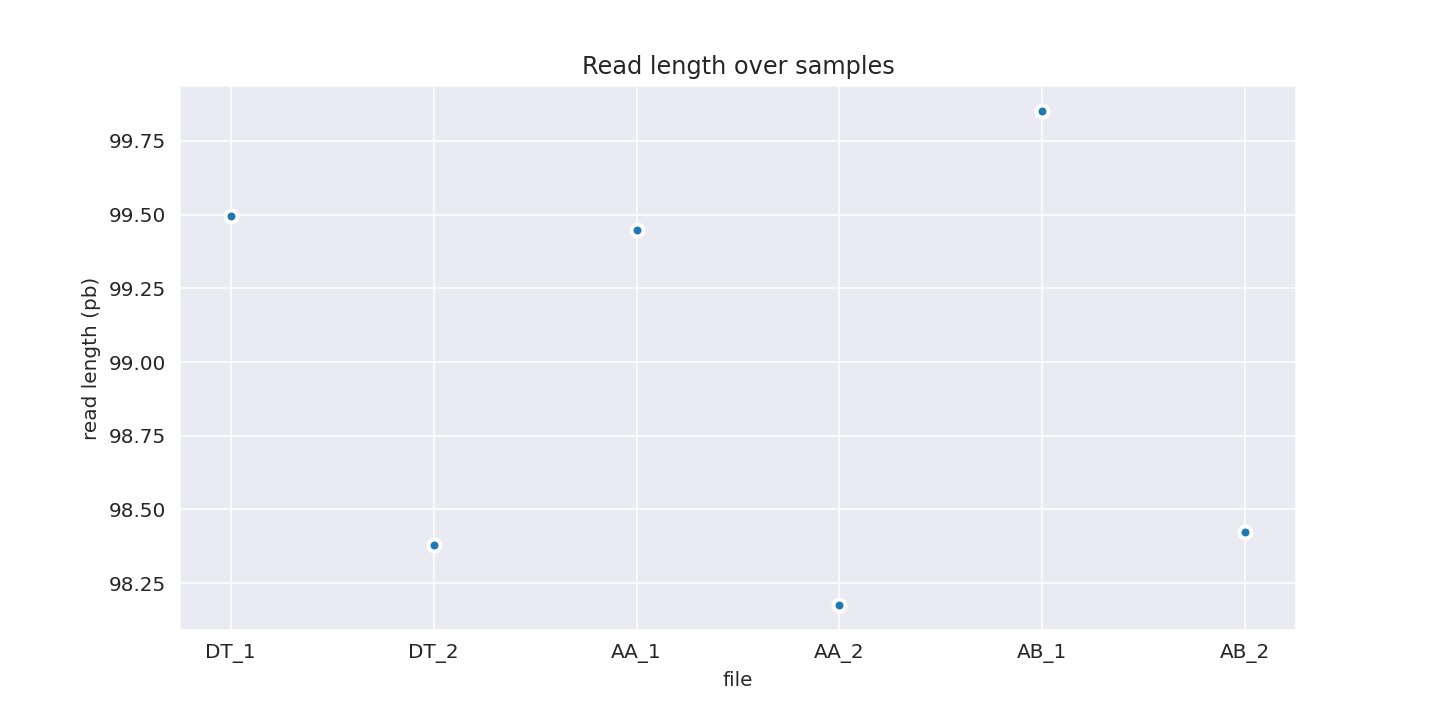
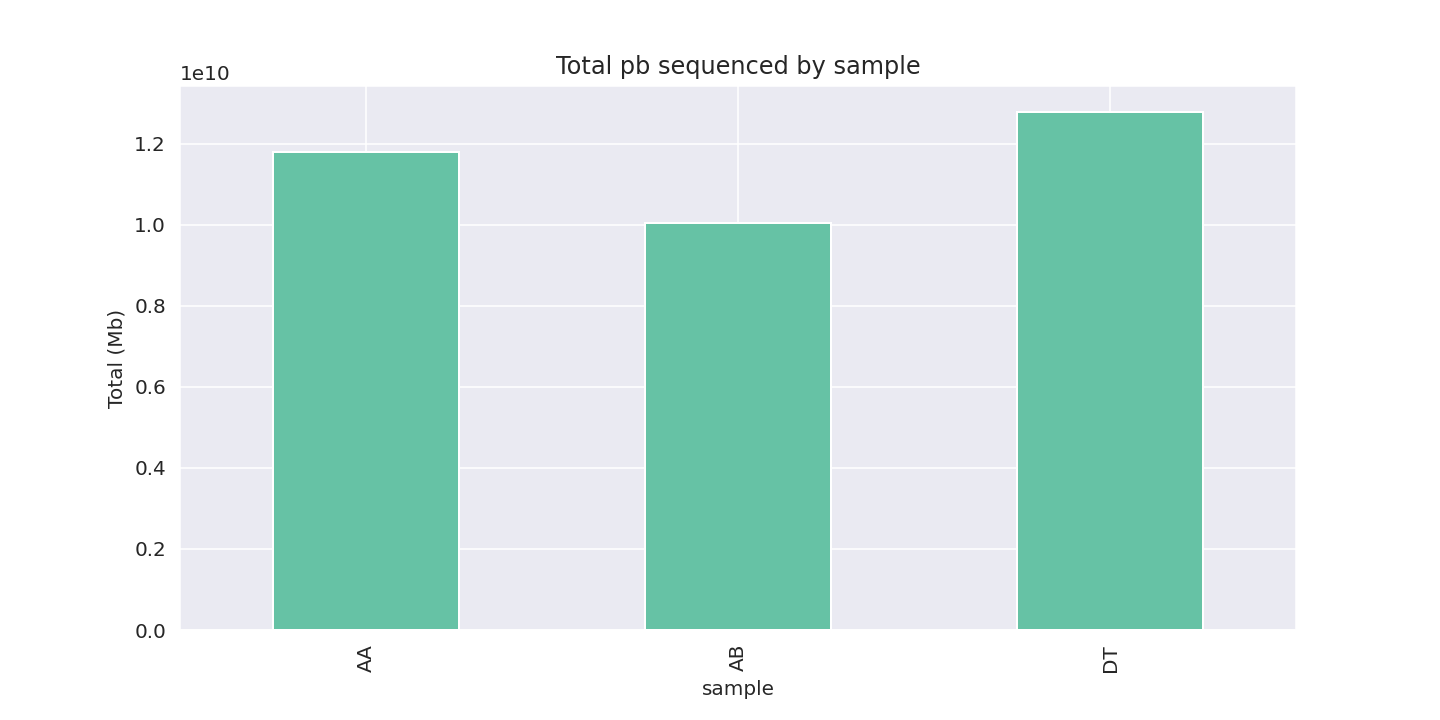
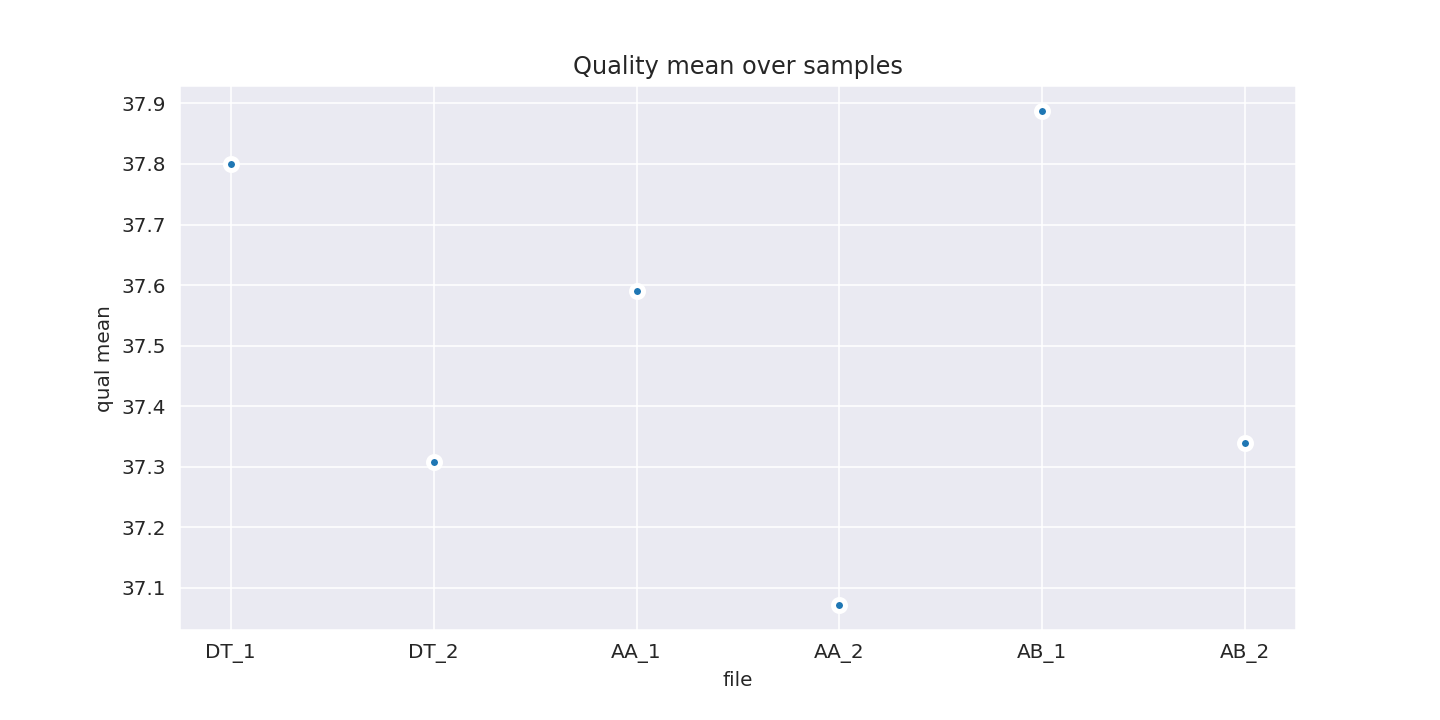
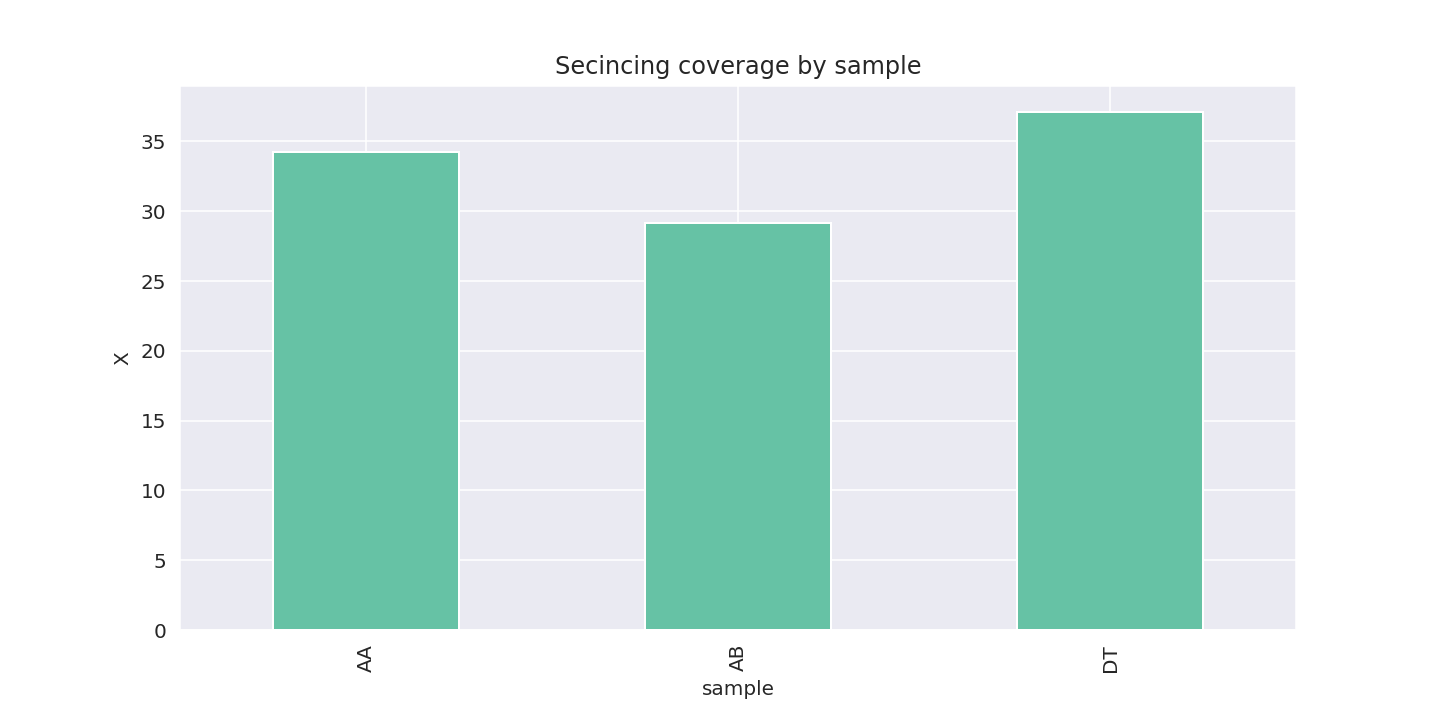
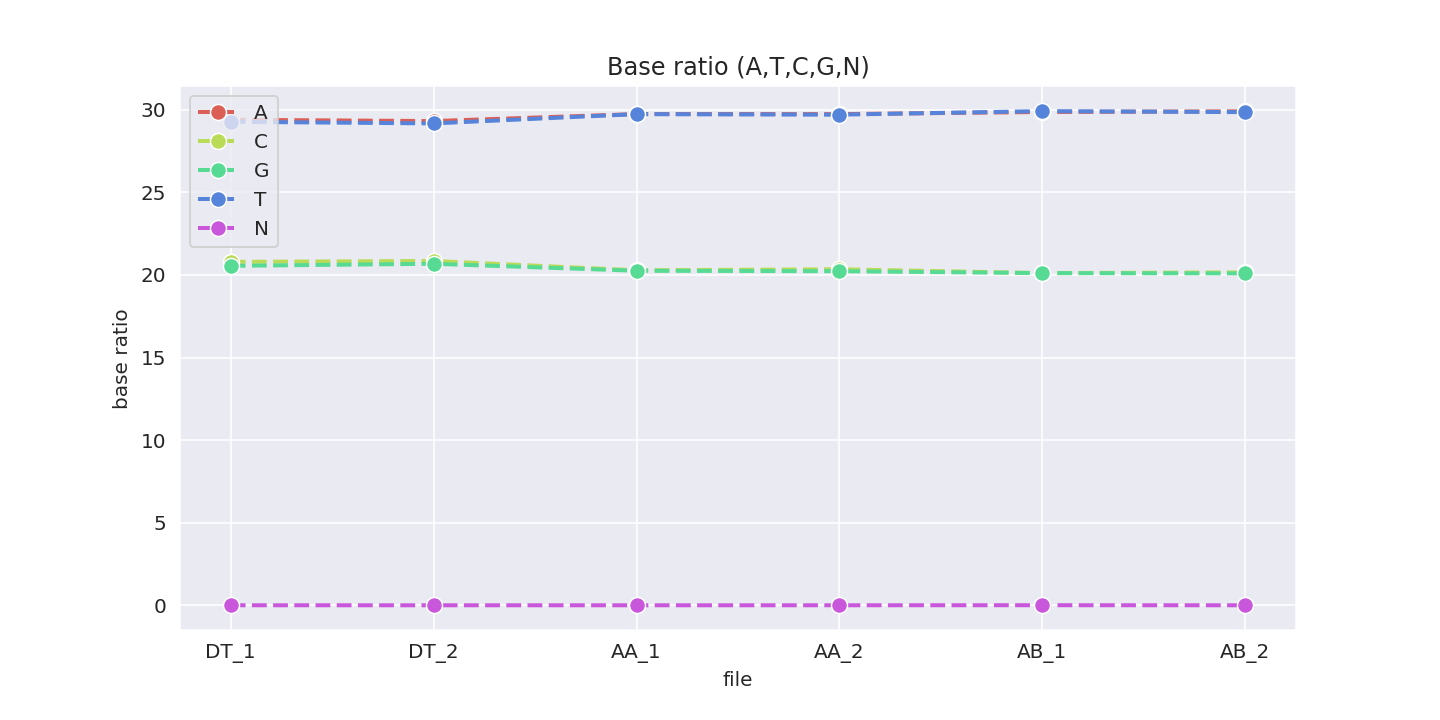

In [19]:
dashboard_fastq(fastqstat_csv,total_genome_size,df_group)

### <span style="color: #919395">_2 - Mapping the individuals reads against the reference genome_  <a class="anchor" id="mapping"></a></span>

#### __Creating output directories used for this analysis step__

In [20]:
output_mapping_dir = output_dir + "/01-mapping_against_reference/"

#### __Mapping with `BWA mem` <a class="anchor" id="mappingbwa">__

Options of bwa-mem : 
* -p : Assume the first input query file is interleaved paired-end FASTQ
* -M : Mark shorter split hits as secondary
* -t : Number of threads

Options of samtools sort : 
* -@ : Set number of sorting and compression threads
* -o : Write the final sorted output to FILE, rather than to standard output

In [21]:
fastq2bam_dir(reference_genome, fastq_dir, df_group, cpu, output_mapping_dir, logger)

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='info', css_classes=['alert', 'alert-info'], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='danger', css_classes=['alert', 'alert-danger'], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

#### __Generating mapping stats <a class="anchor" id="mappingstat">__
    
Statistics are generated by `samtools flagstat` and they are saved into the directory _01_mapping-against_reference_ and the subdirectory _stat_

In [22]:
stat_dir = output_mapping_dir + "/stat/"
make_dir(stat_dir)

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

In [23]:
logger.info(f"MAPPING STAT :")
logger.info(f"\t\tMapping stat directory : {stat_dir}")

for file_name in os.listdir(output_mapping_dir):
    if ".bam" in file_name:
        samtools_flagstat(os.path.join(output_mapping_dir,file_name), stat_dir,logger)

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

* One "flagtstat file" is generated for each bam file (http://www.htslib.org/doc/samtools-flagstat.html).

```bash
59804394 + 0 in total (QC-passed reads + QC-failed reads)
101872 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
59238869 + 0 mapped (99.05% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)
 ```
    

#### __Compiling stats into a unique tabulated file__


In [13]:
merge_flagstat(output_dir=stat_dir, logger=logger)

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

* _all_flagstat.csv_ file 

```bash
sample MAPPED PAIRED UNMAPPED
NL 98.68 94.50 0.59
NF 98.16 96.61 0.38
FV 98.85 97.39 0.40
CG 98.41 95.66 0.68
LQ 99.05 97.27 0.40
ME 98.97 97.15 0.45
HL 97.79 95.32 0.84
AI 98.63 96.23 0.57
FS 98.75 97.14 0.43
BM 98.09 94.62 0.84
```

#### __Mapping dashboard__

Column(background='WhiteSmoke', sizing_mode='stretch_both', width=800)
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Markdown(str)
    [3] Row
        [0] Markdown(str)
        [1] DataFrame(DataFrame, width=400)
    [4] Markdown(str)
    [5] Row
        [0] Markdown(str)
        [1] DataFrame(DataFrame, width=400)
    [6] Markdown(str)
    [7] Row
        [0] Markdown(str)
        [1] DataFrame(DataFrame, width=400)
    [8] Matplotlib(Figure)
    [9] Row
        [0] MultiChoice(margin=(0, 20, 0, 0), name='Group', options=['O. barthii', ...])
        [1] MultiChoice(margin=(0, 20, 0, 0), name='Sample', options=['AA', 'AB', 'DT'])
    [10] ParamFunction(function, max_height=400, width=400)
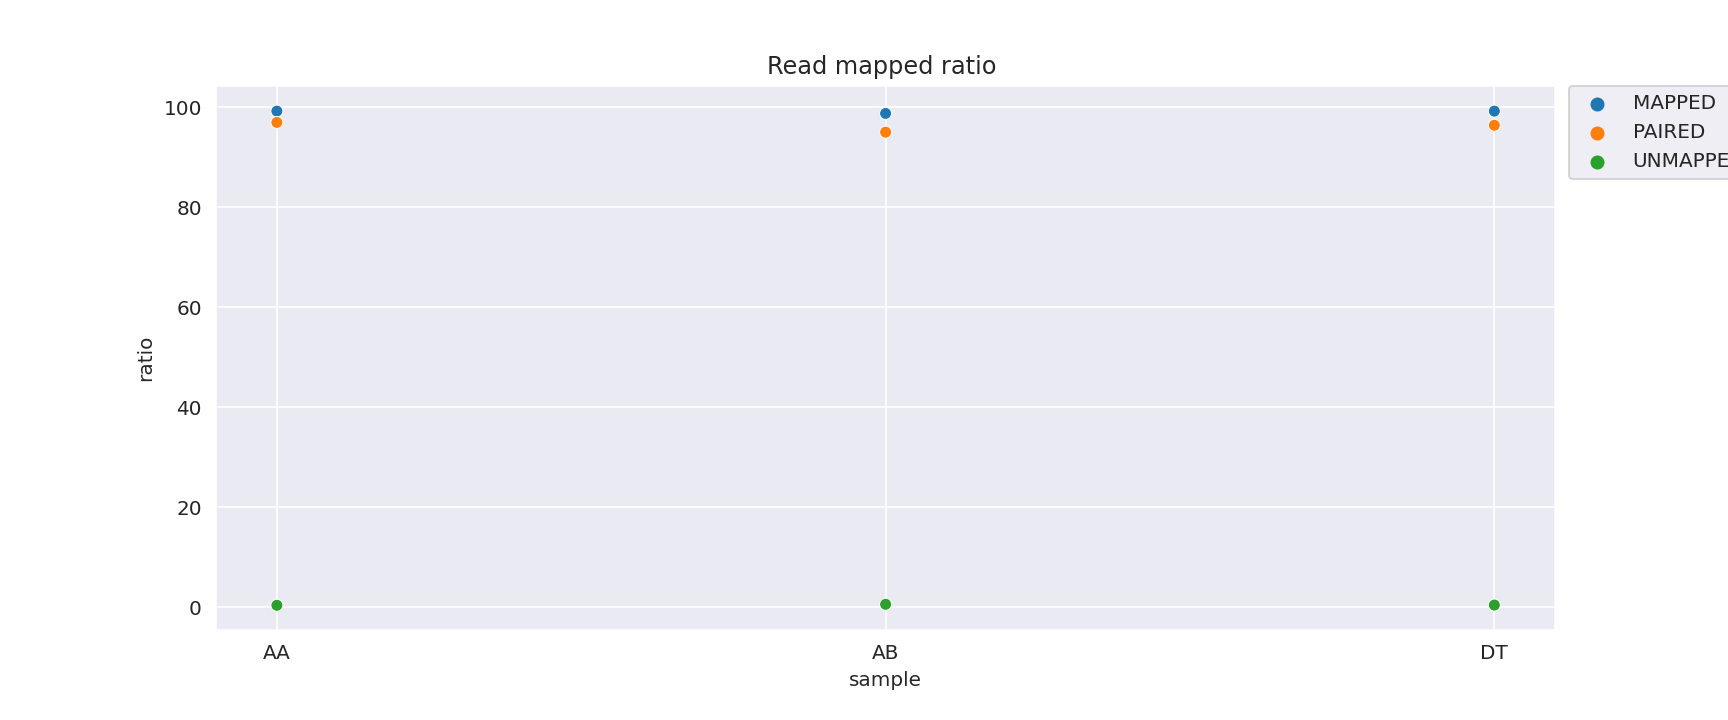

In [15]:
#stat_dir = output_mapping_dir + "/stat/"
stat_file = stat_dir + "all_flagstat.csv"
dashboard_flagstat(stat_file,df_group)

[<img src="Images/up-arrow.png" alt="Top" width=2% align="right">](#home "Go back to the top")


### <span style="color: #919395">3 - Assembly of the individuals' reads that do not map (properly) on the reference genome <a class="anchor" id="assembly"></a></span>

#### __Creating assembly directory__

In [21]:
output_assembly_dir = output_dir + "/02-assembly_unmapped_reads/"
make_dir(output_assembly_dir)
make_dir(output_assembly_dir + "bam_F0x2/")

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

#### __Filtering .bam files with `samtools view`__ 

Options de samtools view : 
   - -b : Output in the BAM format
   - -h : Include the header in the output
   - -F: Do not output alignments with any bits set in INT present in the FLAG field. INT can be specified in hex by beginning with '0x' (i.e. /^0x[0-9A-F]+/) or in octal by beginning with '0' (i.e. /^0[0-7]+/) [0].
   - -@ : Number of BAM compression threads to use in addition to main thread 
   - -o : Output to FILE [stdout]

In [ ]:
for id in id_dict : 
    bam_to_F0x2_bam(reference_genome=reference_genome, 
                    bam_dir=output_mapping_dir, 
                    id=id, 
                    cpu=cpu, 
                    output_dir=output_assembly_dir + "bam_F0x2/", 
                    logger=logger)

#### __Assembly with ABySS__

#### _Choosing optimal k_

```PUT BOX TO SELECT SEVERAL IDs + min, max for k```

In [ ]:
id_test = ["4-X", "78-X", "200-X"]

##### ABySS : k(32 -> 96, 8)

In [ ]:
make_dir(output_assembly_dir + "assembly_choosing_k/")
make_dir(output_assembly_dir + "assembly_choosing_k/abyss/")

# for k in range(32, 97, 8) : 
for k in range(40, 57, 8) :
    for id in id_test : ### INDIVIDUS TEST
        abyss_pe(project_name=project_name, 
                 id=id, 
                 k=k, 
                 bam_dir=output_assembly_dir + "bam_F0x2/", 
                 output_dir=output_assembly_dir + "assembly_choosing_k/abyss/", 
                 logger=logger) 

##### Filter .fastq files

   * contigs : https://github.com/bcgsc/abyss/wiki/ABySS-File-Formats#description-of-rows
   * extract sequence (length >= threshold)

In [ ]:
make_dir(output_assembly_dir + "assembly_choosing_k/fasta_test/")

threshold = 300

logger.info(f"FILTERING SEQUENCES >= THRESHOLD ({threshold})")

# for k in range(32, 97, 8) : 
for k in range(40, 57, 8) :
    for id in id_test : 
        filter_fastq_threshold(file=output_assembly_dir + "assembly_choosing_k/abyss/" + id + "_k" + str(k) + "/" + project_name + "_" + id + "_" + str(k) + "-contigs.fa", 
                               threshold=threshold, 
                               output_file=output_assembly_dir + "assembly_choosing_k/fasta_test/" + id + "_k" + str(k) + "_thr" + str(threshold) + ".fasta") 

##### Stats

Using assembly-stats. NB : L50 is called n50n 

In [ ]:
make_dir(output_assembly_dir + "assembly_choosing_k/plots/")

stat_len, stats_N_hide, stats_N, stats_L_hide, stats_L, stats_gap, stats = def_stats()
create_stats_files(stats=stats,
                  output_dir=output_assembly_dir + "assembly_choosing_k/plots/")

# for k in range(32, 97, 8) : 
for k in range(40, 57, 8) :
    for id in id_test :
        fill_stats_files(input_dir=output_assembly_dir + "assembly_choosing_k/fasta_test/",
                id=id,
                k=k,
                output_dir=output_assembly_dir + "assembly_choosing_k/plots/",
                threshold=threshold,
                logger=logger)

How to choose k ?
   * total_length : +++
   * N50 : +++
   * L50 : ---

```Definitions ?```

In [ ]:
stat_len_df = pd.read_csv(output_assembly_dir + "assembly_choosing_k/plots/assembly-stats-" + stat_len[0] + ".csv", sep='\t')

size = sns.relplot(x='k', y='value', hue='stat', data=stat_len_df, col='id', kind="line")
size.savefig(output_assembly_dir + "assembly_choosing_k/plots/stat_len.png")

hide_cell()

In [ ]:
stats_N_files = []
for stat in stats_N : 
    stats_N_files.append(output_assembly_dir + "assembly_choosing_k/plots/assembly-stats-" + stat + ".csv")
stats_N_df = pd.concat([pd.read_csv(f, sep='\t') for f in stats_N_files], ignore_index = True)

size = sns.relplot(x='k', y='value', hue='stat', data=stats_N_df, col='id', kind="line")
size.savefig(output_assembly_dir + "assembly_choosing_k/plots/stat_N.png")


hide_cell()

In [ ]:
stats_L_files = []
for stat in stats_L : 
    stats_L_files.append(output_assembly_dir + "assembly_choosing_k/plots/assembly-stats-" + stat + ".csv")
stats_L_df = pd.concat([pd.read_csv(f, sep='\t') for f in stats_L_files], ignore_index = True)

size = sns.relplot(x='k', y='value', hue='stat', data=stats_L_df, col='id', kind="line")
size.savefig(output_assembly_dir + "assembly_choosing_k/plots/stat_L.png")


hide_cell()

```PUT BOX TO SELECT k```

In [24]:
k = 64 ### box ?

#### Running ABySS for each individual

In [ ]:
!mkdir $output_assembly_dir"assembly_all_contigs/"

for id in id_dict :
    if id in id_test :
        id_folder = output_assembly_dir + "assembly_choosing_k/" + id + "_k" + str(k) + "/"
        target_folder = output_assembly_dir + "assembly_all_contigs/"
        !scp -r $id_folder $target_folder
    else : 
        abyss_pe(project_name=project_name, 
                 id=id, 
                 k=k, 
                 bam_dir=output_assembly_dir + "bam_F0x2/", 
                 output_dir=output_assembly_dir + "assembly_all_contigs/") 
        
# rm -r $output_assembly_dir"assembly_choosing_k/abyss/"

In [ ]:
!mkdir $output_assembly_dir"assembly_all_contigs/"

for id in id_dict :
    abyss_pe(project_name=project_name, 
                 id=id, 
                 k=k, 
                 bam_dir=output_assembly_dir + "bam_F0x2/", 
                 output_dir=output_assembly_dir + "assembly_all_contigs/",
                logger=logger) 
        

`TODO : PUT TABLE SYNTHESE`

[<img src="Images/up-arrow.png" alt="Top" width=2% align="right">](#home "Go back to the top")
    
### <span style="color: #919395"> 4 - Removing contamination<a class="anchor" id="contamination"></a></span>

#### __VecScreen__

#### __BLASTn__

#### __Control of the assembly with long reads (optionnal)__

[<img src="Images/up-arrow.png" alt="Top" width=2% align="right">](#home "Go back to the top")
    
### <span style="color: #919395"> 5 - Reducing Sequence Redundancy<a class="anchor" id="redundancy"></a></span>

frangiPANe uses CD-HIT to cluster sequences and to reduce sequence redundancy (inter and intra-species).

#### __Create clustering directory__

In [30]:
output_clustering_dir = output_dir + "03-clustering/"
make_dir(output_clustering_dir)

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

#### __Merge all contigs__


In [7]:
# TODO a remonter et definir dans la partie assemblage
#output_assembly_dir = output_dir + "/02-assembly_unmapped_reads/"
#output_clustering_dir = output_dir + "03-clustering/"
output_assembly_contigs = output_assembly_dir + "assembly_all_contigs"

In [18]:
copy_cluster(output_assembly_contigs,output_clustering_dir)
### ADD logger

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='info', css_classes=['alert', 'alert-info'], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

In [8]:
merged_contigs = output_clustering_dir+project_name+"allContigs.fa"    
merging_cluster(output_clustering_dir,merged_contigs)

# TODO CD : CHECK NB SEQUENCE OK ET PRINT DANS LE MSG + add logger

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

#### __Run clustering__


In [34]:
cdhit_fasta = output_clustering_dir+project_name+"clusters.cdhit"  
cdhit(merged_contigs,0.8,0.95, cdhit_fasta, logger)

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

#### __Analyzing cdhit results__

In [10]:
cdhit_fasta = output_clustering_dir+project_name+"clusters.cdhit"  
cdhit_cluster = cdhit_fasta + ".clstr"
cdhit_csv=cdhit_fasta + ".csv"
df_cdhit=parse_cdhit(cdhit_cluster, df_group, cdhit_csv)

#### __Dasboard__


Column(background='WhiteSmoke', sizing_mode='stretch_both', width=800)
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Row
        [0] Markdown(str)
        [1] Markdown(str)
    [3] Matplotlib(Figure)
    [4] Matplotlib(Figure)
    [5] Matplotlib(Figure)
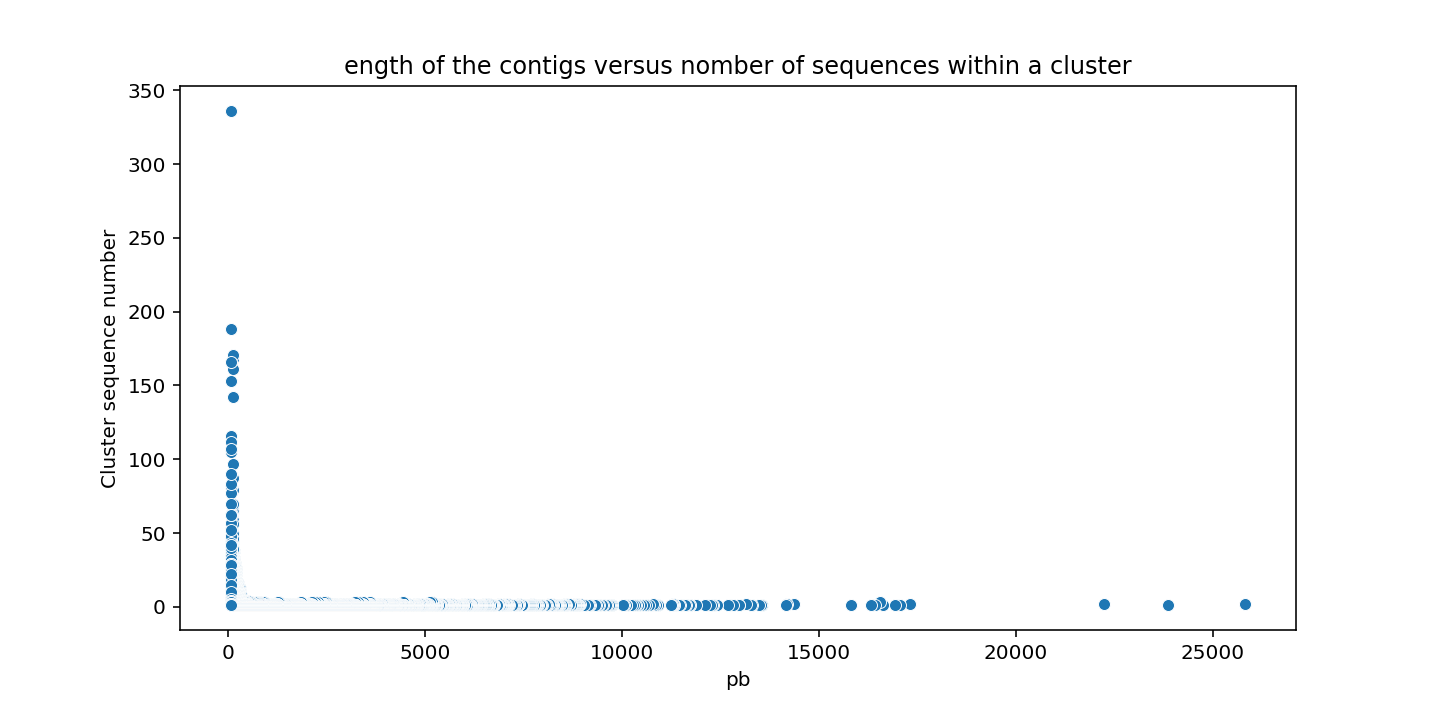
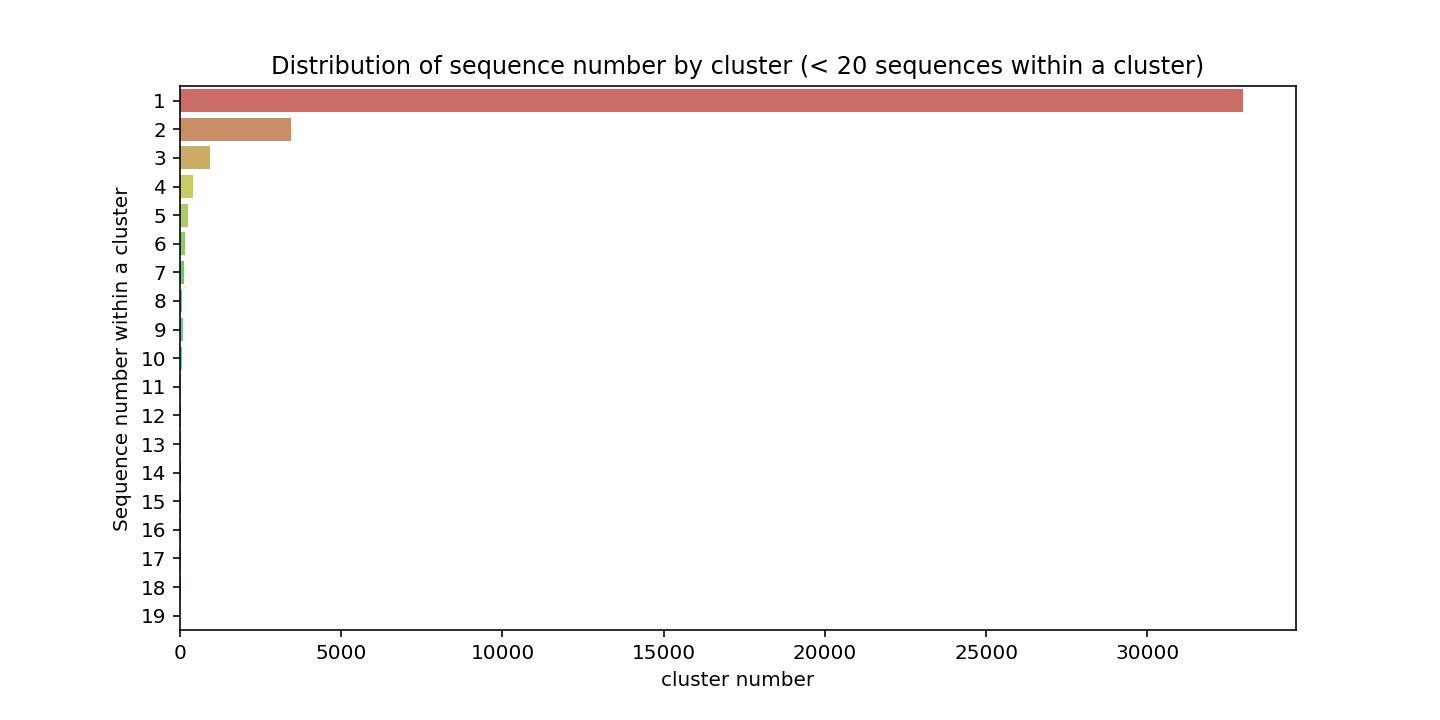
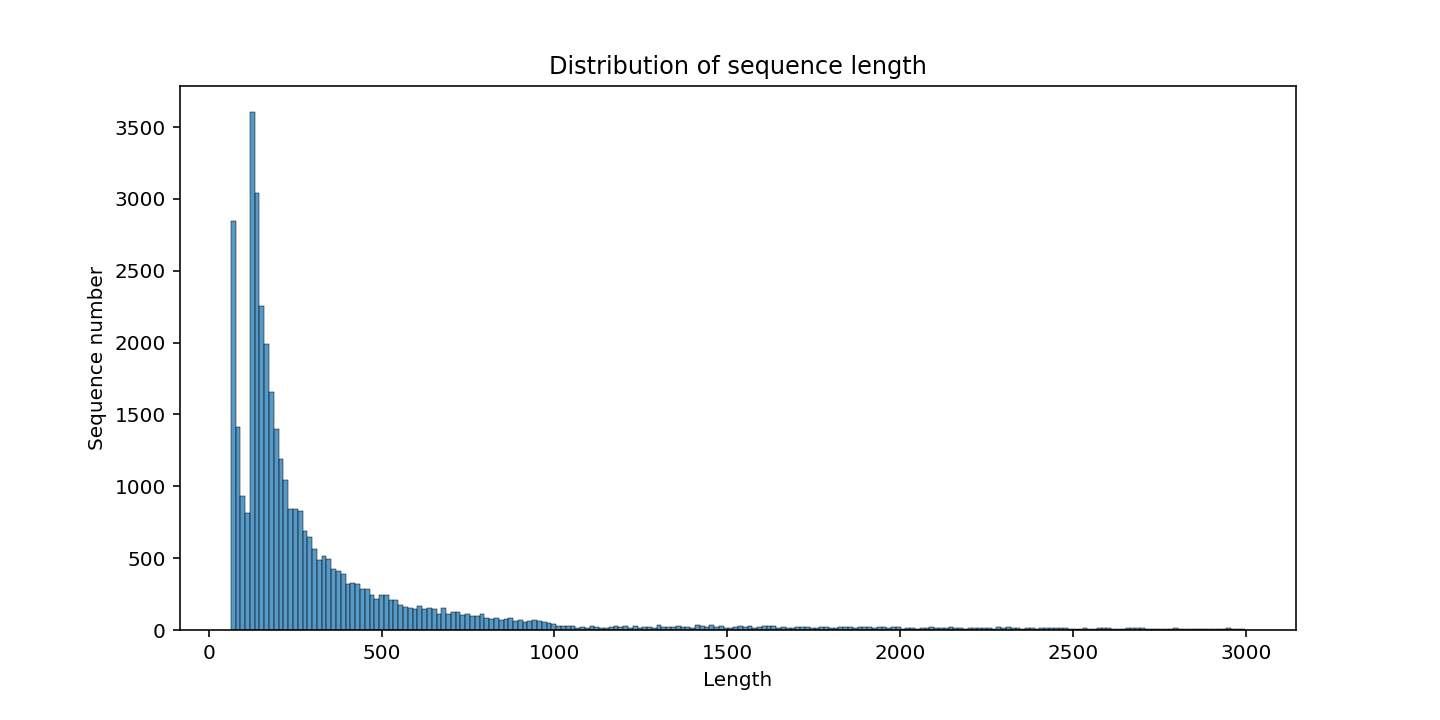

In [11]:
dashboard_cdhit(df_cdhit)

[<img src="Images/up-arrow.png" alt="Top" width=2% align="right">](#home "Go back to the top")
    
### <span style="color: #919395"> 6 - Anchoring Clusters on Reference Genome<a class="anchor" id="anchoring"></a></span>

#### __Generating panreference__

#### __Mapping against panreference__

#### __Anchoring contigs on reference genome__

#### __Panreference dashboard__

---
